In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [4]:
pwd

'C:\\Users\\91911\\Documents\\Python Scripts'

In [5]:
df=pd.read_csv('C:\\Users\\91911\\Documents\\Python Scripts\\kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.drop(['id','lat','long','zipcode'],inplace=True,axis=1)

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  sqft_living15  2161

In [12]:
df['date']=pd.to_datetime(df['date'])

In [14]:
df['house_age']=df['date'].dt.year-df['yr_built']

In [15]:
df['house_age']

0        59
1        63
2        82
3        49
4        28
         ..
21608     5
21609     1
21610     5
21611    11
21612     6
Name: house_age, Length: 21613, dtype: int64

In [16]:
df.drop('date',inplace=True,axis=1)

In [17]:
df['renovated']=df['yr_renovated'].apply(lambda x:0 if x==0 else 1)

In [18]:
df.drop('yr_renovated',inplace=True,axis=1)

In [26]:
df[['renovated','house_age']].unstack()

renovated  0         0
           1         1
           2         0
           3         0
           4         0
                    ..
house_age  21608     5
           21609     1
           21610     5
           21611    11
           21612     6
Length: 43226, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  house_age      21613 non-null  int64  
 16  renovated      21613 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.8 MB


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [48]:
x=df[['sqft_living']]
x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [49]:
y=df['price']

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [51]:
linear_regression=LinearRegression()

In [52]:
scaler=StandardScaler()

In [53]:
x_train=scaler.fit_transform(x_train)

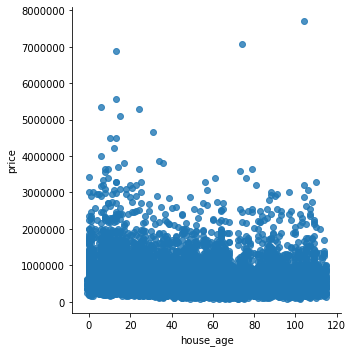

In [43]:
sns.lmplot('house_age','price',df)

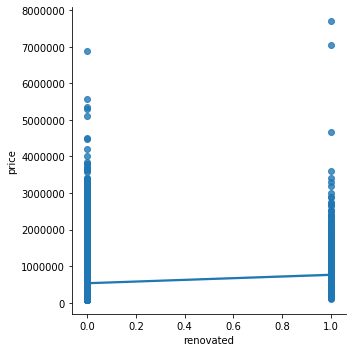

In [44]:
sns.lmplot('renovated','price',df)

In [60]:
sns.lmplot(x_test,df['price'])

TypeError: lmplot() missing 1 required positional argument: 'data'

In [61]:
import matplotlib.pyplot as plt

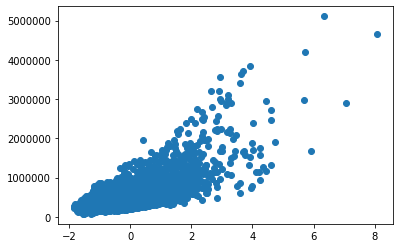

In [67]:
plt.scatter(x_test,y_test)

In [68]:
x_test=scaler.fit_transform(x_test)

In [69]:
model=linear_regression.fit(x_train,y_train)

In [70]:
y_pred=model.predict(x_test)

In [76]:
data_table=pd.DataFrame({'Test':y_test,'Predicted':y_pred})
data_table.sample(10)

,Test,Predicted
16660,1100000.0,524166.731954
16918,830000.0,723381.460515
806,308000.0,499606.011994
14040,455000.0,453213.540959
7691,320000.0,562372.296335
5838,980000.0,715194.553861
2729,385000.0,185774.590289
16125,800000.0,717923.522746
56,292500.0,578746.109642
7743,345000.0,294933.345665


In [78]:
print("Trainning Score ",linear_regression.score(x_train,y_train))

Trainning Score  0.4871746039750896


In [79]:
from sklearn.metrics import r2_score

In [80]:
score=r2_score(y_test,y_pred)

In [81]:
print("Testing Score ",score)

Testing Score  0.5122337879787286


In [82]:
y_pred

array([543269.51414449, 305849.22120219, 202148.40359521, ...,
       363157.56777447, 630596.51844511, 807979.49593073])

In [85]:
y_test.values

array([425000., 294000., 310000., ..., 201000., 720000., 844000.])

In [1]:
plt.subplots(figsize=(14,8))
plt.plot(y_pred,label='Predicted')
#lt.plot(y_test.values,label='Actual')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [93]:
df.to_csv(r'C:\Users\91911\Documents\Python Scripts\house_data.csv',index=False)